In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [2]:
df=pd.read_csv('train (1).csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(df.columns)
print(df.shape)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
(42000, 785)


In [4]:
data=df.values
x=data[:,1:]
y=data[:,0]
print(x.shape,y.shape)

(42000, 784) (42000,)


In [5]:
split=int(0.8*x.shape[0])
split

33600

In [6]:
x_train=x[:split,:]
x_test=x[split:,:]
y_train=y[:split]
y_test=y[split:]
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


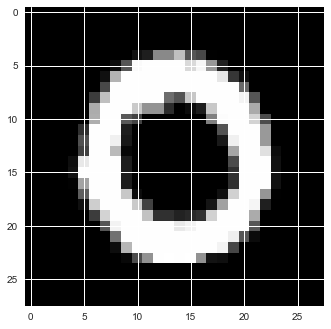

0


In [7]:
def drawImage(sample):
    img=sample.reshape(28,28)
    plt.imshow(img,cmap='gray')
    plt.show()

drawImage(x_train[1])
print(y_train[1])

In [8]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [9]:
def knn(x_train,y_train,querypt,k=5):
    vals=[]
    for i in range(x_train.shape[0]):
        dist=distance(x_train[i],querypt)
        vals.append((dist,y_train[i]))
    #print(vals)
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    x=np.unique(vals[:,1],return_counts=True)
    index=x[1].argmax()
    return x[0][index]

In [10]:
knn(x_train,y_train,x_test[2])

7.0

7


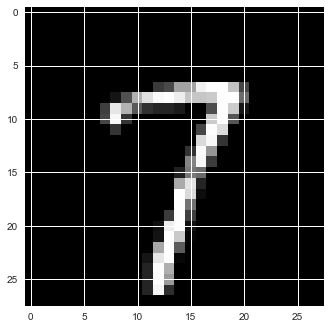

None


In [11]:
print(y_test[2])
print(drawImage(x_test[2]))

In [12]:
def accuracy(x_train,y_train,x_test,y_test):
    ans=0
    for i in range(x_test.shape[0]):
        pred=knn(x_train,y_train,x_test[i])
        print(pred)
        if pred==y_test[i]:
            ans+=1
    return ans/x_test.shape[0]

In [ ]:
accuracy(x_train,y_train,x_test,y_test)

0.0
7.0
7.0
2.0
2.0
6.0
5.0
7.0
5.0
5.0
3.0
0.0
2.0
7.0
6.0
9.0
2.0
3.0
5.0
1.0
6.0
2.0
8.0
0.0
2.0
8.0
9.0
7.0
9.0
4.0
7.0
8.0
4.0
1.0
3.0
9.0
3.0
4.0
0.0
8.0
0.0
9.0
1.0
8.0
5.0
5.0
9.0
4.0
1.0
8.0
7.0
7.0
4.0
4.0
3.0
3.0
7.0
5.0
6.0
5.0
4.0
6.0
9.0
6.0
4.0
1.0
5.0
3.0
8.0
0.0
6.0
0.0
0.0
2.0
5.0
7.0
9.0
9.0
0.0
1.0
5.0
8.0
9.0
1.0
8.0
1.0
4.0
6.0
1.0
0.0
2.0
1.0
6.0
1.0
6.0
0.0
4.0
3.0
7.0
7.0
5.0
1.0
8.0
3.0
6.0
2.0
7.0
9.0
6.0
3.0
6.0
9.0
5.0
1.0
9.0
9.0
5.0
9.0
6.0
6.0
6.0
7.0
9.0
6.0
2.0
7.0
2.0
5.0
8.0
7.0
6.0
3.0
5.0
9.0
3.0
9.0
0.0
4.0
2.0
7.0
7.0
8.0
7.0
4.0
4.0
2.0
4.0
0.0
1.0
3.0
1.0
7.0
5.0
3.0
6.0
1.0
2.0
3.0
6.0
5.0
7.0
6.0
3.0
9.0
2.0
9.0
9.0
6.0
4.0
8.0
5.0
3.0
1.0
7.0
4.0
7.0
7.0
8.0
1.0
5.0
3.0
4.0
9.0
8.0
9.0
9.0
4.0
0.0
2.0
0.0
9.0
8.0
3.0
9.0
6.0
7.0
5.0
9.0
5.0
1.0
1.0
8.0
7.0
9.0
2.0
5.0
6.0
4.0
0.0
8.0
3.0
1.0
1.0
9.0
5.0
0.0
4.0
2.0
1.0
0.0
5.0
8.0
7.0
9.0
3.0
